# Introduction

Speech in its true analog form takes upon continuous values and is defined throughout time. In the olden days, various analog methods were used to record and store all kinds of sounds including speech. However, in order for us to perform analysis and carry out other speech related tasks on a digital machine, such an infinitely rich representation would be impossible to store, much less process, since digital machines deal with a finite representation of any sort of data and can only process finite data in finite time. Furthermore, the problem of communicating speech data between users, which can information theoretically transfer data at a finite maximum rate due to noisy channel effects, beckons the digitization of speech data. As a means to an end, we compromise on having a lossless representation in two ways, namely, discretization and quantization.

# History

Some of the methods that were used to store audio data are presented here.

## Phonautograph

The phonautograph is the earliest known device for recording sound. This consists of sheets of paper with sound-wave-modulated white lines created by a vibrating stylus that cut through a coating of soot as the paper was passed under it. These recordings however could not be played back until 2008 when researchers devised a method to playback the captured sound. Below is an image of the same:

![Phonoautograph](Phonoautograph.jpg)

Credit: https://www.pinterest.com/pin/480900066454878689/

## Magnetic Tape

Magnetic tape recording uses an amplified electrical audio signal to generate analogous variations of the magnetic field produced by a tape head, which impresses corresponding variations of magnetization on the moving tape. In playback mode, the signal path is reversed, the tape head acting as a miniature electric generator as the varyingly magnetized tape passes over it. Below is an image of a casette which used magnetic tape:

![Magnetic_Tape](Magnetic_Tape.jpg)

Credit: https://newatlas.com/sony-185-tb-magnetic-tape-storage/31910/

Although modern analog recordings can sound natural and warm, they can be expensive, hard to maintain due to the physical nature of storage, and may degrade over time.

# Discretization

Upon the arrival of digital audio storage technology, analog sound had to be sampled at a finite rate. Since the frequency content of human speech does not exceed 4 kHz, by Nyquist theorem, it's sufficient to sample speech signals at 8 kHz, that is, 8000 samples per second. Sampling at a rate lower than this can cause severe distortion of the signal when played back. An illustration of sampling is shown below:

![Sampling](Discretization.jpg)

Credit: https://pictureofgoodelectroniccircuit.blogspot.com/2010/04/phase-and-function-of-analog-signal-or.html

# Quantization

Now it is not sufficient that we have a finite sampling rate. Each sample cannot be stored with an infinite amount of precision. Thus, we quantize the amplitude of these signals into one of a number of predefined levels.

Let's start visualizing this with the help of a real audio signal



In [2]:
from scipy.signal import spectrogram
from scipy.io import wavfile
import matplotlib.pyplot as plt, numpy as np
from IPython.display import Audio, display

samplerate, zero_utterance = wavfile.read('200102009_0_1.wav');

This audio file contains an utterance of the word "zero" and has been recorded at a rate of 16 kHz with a precision of 16 bits per sample using Audacity. The type of quantization used is uniform PCM, meaning that there are no non-linearities in the quantizer function. This means that the value of each sample will range from -32768 to +32767. A caricature of two different uniform quantizer functions are shown below where the y axis shows the corresponding quantized level for any amplitude on the x axis:

![Uniform_Quantizer](Uniform_Quantizer3.jpg)

Credit: https://www.tutorialspoint.com/digital_communication/digital_communication_quantization.htm

15483


Text(0.5, 1.0, 'Normalized Waveform')

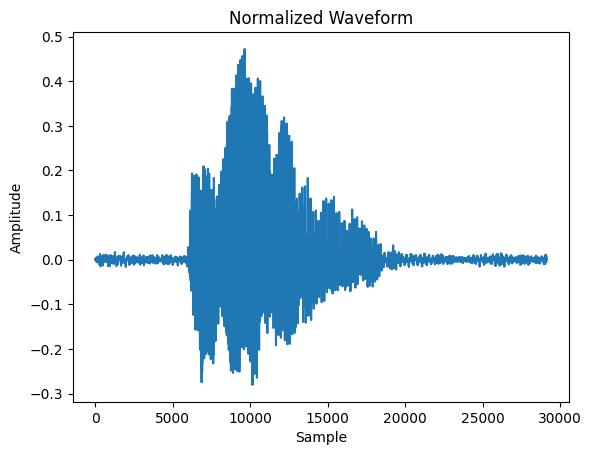

In [3]:
print(np.max(zero_utterance[:, 0]));

plt.plot(zero_utterance[:, 0]/pow(2, 15))
plt.xlabel('Sample');
plt.ylabel('Amplitude');
plt.title('Normalized Waveform')

Above, we plot a normalized version of the waveform

In [4]:
display(Audio(zero_utterance[:, 0], rate=samplerate))

Now, when we quantize a signal, it's equivalent to adding noise to the original signal as the original precision of the signal is lost. This noise is termed as quantization noise.

In fact we can visualise this quantization noise by finding the difference between the original signal and the quantized version.

Let's quantize the signal to 8 bits of precision



This is what the audio sounds like:

In [5]:
quantized_zero_utterance = np.round(zero_utterance[:, 0]/pow(2, 8))*pow(2, 8)

Text(0.5, 1.0, 'Quantization Noise')

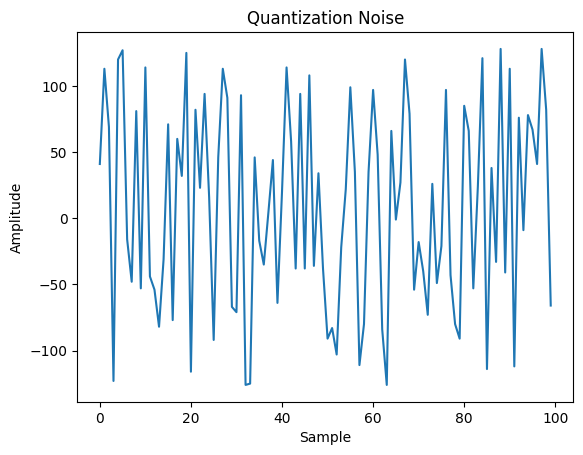

In [6]:
plt.plot((zero_utterance[:, 0] - quantized_zero_utterance)[10000:10100]);
plt.xlabel('Sample');
plt.ylabel('Amplitude');
plt.title('Quantization Noise')

Above is a plot of the quantization noise, we can see that it's somewhat bounded between -128 to 128, which makes sense since when we round off the values, every signal point is quantized to 8 bits, the difference between the original signal and the quantized signal will have a range of 2^8.

# (HEADPHONE WARNING!)
This is what the quantization noise sounds like. The label "noise" seems to check out.

In [7]:
display(Audio(zero_utterance[:, 0] - quantized_zero_utterance, rate=samplerate))

This is what the 8 bit quantized audio sounds like. It sounds like some noise has been added to the file and the clarity of the utterance has decreased considerably.

In [8]:
display(Audio(quantized_zero_utterance, rate=samplerate))

Text(0.5, 1.0, '256 Level Quantized Utterance Spectrogram')

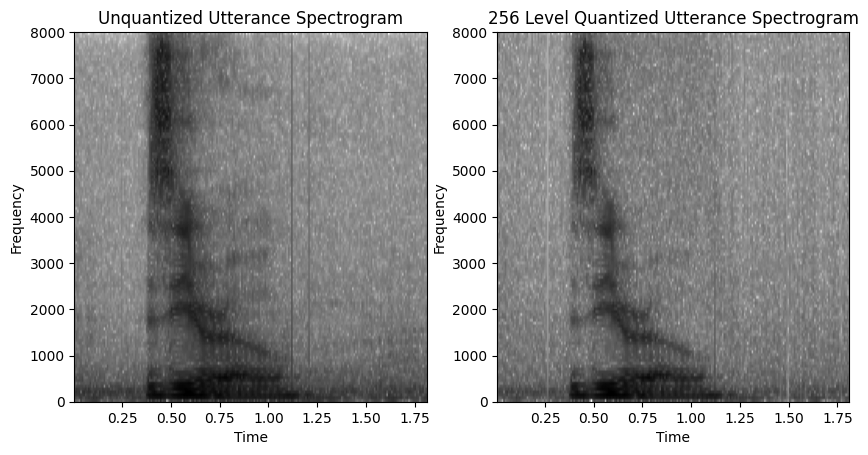

In [9]:
fig, ax = plt.subplots(1, 2, width_ratios = [0.5, 0.5]);
fig.set_figwidth(10)
ax[0].specgram(zero_utterance[:, 0], Fs=samplerate, cmap='gray_r')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Unquantized Utterance Spectrogram')
ax[1].specgram(quantized_zero_utterance, Fs=samplerate, cmap='gray_r')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')
ax[1].set_title('256 Level Quantized Utterance Spectrogram')

Here we visibly see the difference between the quantized and unquantized spectrograms.

The quantized spectrogram seems to have lost energy where the signal used to be strongly present. In addition, the spectrogram seems to contain higher energy where the spectrogram of the signal was not previously present.

This effect is further magnified when we consider quantization to just 2^6 levels.

In [10]:
quantized_zero_utterance = np.round(zero_utterance[:, 0]/pow(2, 10))*pow(2, 10)

c:\Users\thoma\OneDrive\Documents\lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5, 1.0, '64 Level Quantized Utterance Spectrogram')

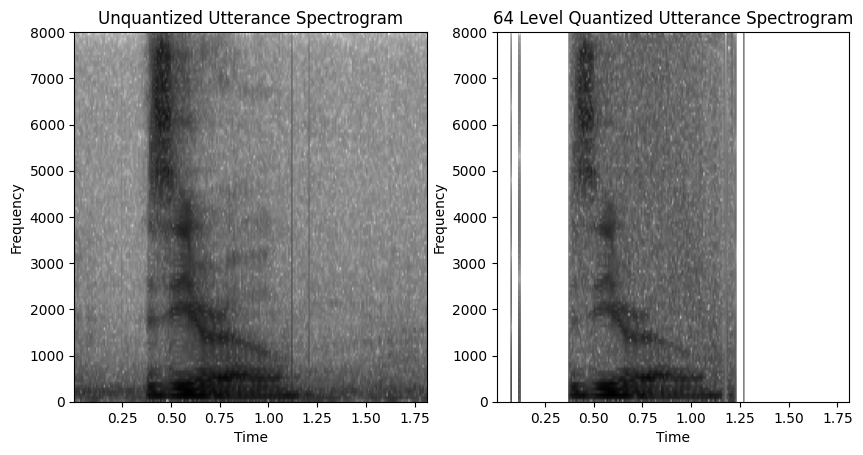

In [11]:
fig, ax = plt.subplots(1, 2, width_ratios = [0.5, 0.5]);
fig.set_figwidth(10)
ax[0].specgram(zero_utterance[:, 0], Fs=samplerate, cmap='gray_r')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Unquantized Utterance Spectrogram')
ax[1].specgram(quantized_zero_utterance, Fs=samplerate, cmap='gray_r')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')
ax[1].set_title('64 Level Quantized Utterance Spectrogram')

Further, we can observe the spectrogram of the quantization noise alone:

Text(0.5, 1.0, 'Quantization Noise Spectrogram')

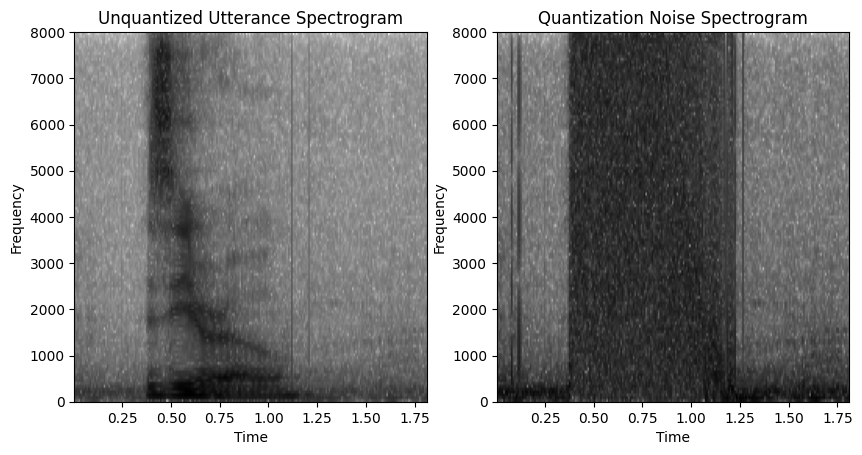

In [12]:
fig, ax = plt.subplots(1, 2, width_ratios = [0.5, 0.5]);
fig.set_figwidth(10)
ax[0].specgram(zero_utterance[:, 0], Fs=samplerate, cmap='gray_r')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Unquantized Utterance Spectrogram')
ax[1].specgram(quantized_zero_utterance - zero_utterance[:, 0], Fs=samplerate, cmap='gray_r')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Quantization Noise Spectrogram')

# Theory (But Not Really)
The observations of the quantized spectrogram are consistent with what we perceive from hearing the audio file. The spoken word is less perceptible and more noisy, and the base energy of the spectrogram increases in all frequencies due to the addition of quantization noise to the unquantized audio.

Because of the completely random nature of quantization noise, it seems to contain all frequencies, that is, be white in nature.

In general however, this condition is only satisfied when the following four conditions are met:

1. The input approaches the different quantization level values with equal probability.
2. The quantization error is not correlated with the input.
3. The quantizer has a large number of quantization levels.
4. The quantization steps are uniform.

Ref: https://www.allaboutcircuits.com/technical-articles/quantization-nois-amplitude-quantization-error-analog-to-digital-converters/#:~:text=Since%20the%20Fourier%20transform%20of%20a%20delta%20function,with%20total%20power%20equal%20to%20LSB%202%20%2F12.

Speech is largely random in its input distribution and hits quantization levels within its range almost equally, neither is the error conceivably correlated with the input. We use 256 levels to quantize the input and the nature of quantization is indeed uniform.

Because of these conditions being satisfied, the quantization noise is more or less white and thus the base energy of the spectrogram increases.

Another interesting aspect to explore what actually happens when the number of quantization levels is unviably low.

Let us see what the quantized audio sounds like:



In [13]:
quantized_zero_utterance = np.round(zero_utterance[:, 0]/pow(2, 13))*pow(2, 13)

In [14]:
display(Audio(quantized_zero_utterance, rate=samplerate))

As expected, it's very noisy.
Now, let's hear the quantization noise:

In [15]:
display(Audio(quantized_zero_utterance - zero_utterance[:, 0], rate=samplerate))

The surprising thing is that the quantization noise seems to contain more of the signal than the quantized utterance itself!

Lets plot the quantization noise to see why that maybe:

Text(0.5, 1.0, 'Quantization Noise')

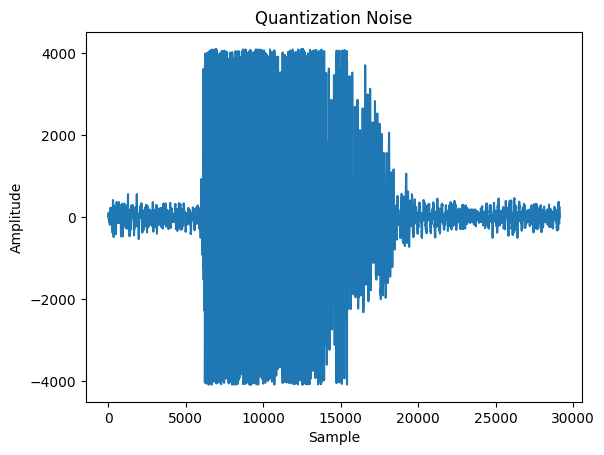

In [16]:
plt.plot((zero_utterance[:, 0] - quantized_zero_utterance));
plt.xlabel('Sample');
plt.ylabel('Amplitude');
plt.title('Quantization Noise')

No wonder! The quantization noise waveform seems to contain features of the original waveform. This happens because the quantization levels are very far apart, thereby causing large chunks of the audio get quantized to the same level thus allowing the difference between the original and the quantized audio to contain large parts of the original waveform.